In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

C:\Users\Asus\Anaconda\envs\py3-TF2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asus\Anaconda\envs\py3-TF2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asus\Anaconda\envs\py3-TF2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asus\Anaconda\envs\py3-TF2.0\lib\site-packages\tensorflow\

In [3]:
(xTrn, yTrn), (xTst, yTst) = tf.keras.datasets.fashion_mnist.load_data()
xTrn, xTst = xTrn/255, xTst/255

## Visualize the data

xTrn shape:  (60000, 28, 28) yTrn shape:  (60000,)
60000 train set


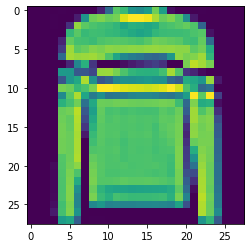

In [4]:
print("xTrn shape: ", xTrn.shape,"yTrn shape: ", yTrn.shape)

print(xTrn.shape[0], 'train set')

fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

plt.imshow(xTrn[5])

## Higher dimension

In [5]:
xTrn = np.expand_dims(xTrn,-1)
xTst = np.expand_dims(xTst,-1)
print(xTrn.shape)

(60000, 28, 28, 1)


In [7]:
K = len(set(yTrn))
print("Number of classes: ", K)

Number of classes:  10


## Model build Functional API

In [9]:
i = Input(shape = xTrn[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation='relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation='relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
r = model.fit(xTrn, yTrn, validation_data = (xTst, yTst), epochs = 15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 23s 385us/sample - loss: 0.5103 - accuracy: 0.8112 - val_loss: 0.3794 - val_accuracy: 0.8582
Epoch 2/15
60000/60000 [==============================] - 22s 373us/sample - loss: 0.3490 - accuracy: 0.8695 - val_loss: 0.3328 - val_accuracy: 0.8723
Epoch 3/15
60000/60000 [==============================] - 23s 382us/sample - loss: 0.3029 - accuracy: 0.8867 - val_loss: 0.3282 - val_accuracy: 0.8783
Epoch 4/15
60000/60000 [==============================] - 23s 385us/sample - loss: 0.2684 - accuracy: 0.8994 - val_loss: 0.3046 - val_accuracy: 0.8892
Epoch 5/15
60000/60000 [==============================] - 23s 389us/sample - loss: 0.2471 - accuracy: 0.9070 - val_loss: 0.3108 - val_accuracy: 0.8877
Epoch 6/15
60000/60000 [==============================] - 23s 386us/sample - loss: 0.2254 - accuracy: 0.9144 - val_loss: 0.2952 - val_accuracy: 0.8973
Epoch 7/15
60000/60000 [====================

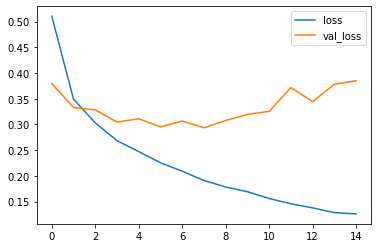

In [11]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

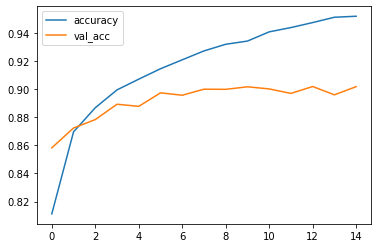

In [13]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

##### Model seems to overfit, model is becoming more and more confident in its incorrect prediction. 

In [24]:
from sklearn.metrics import confusion_matrix
import itertools

Confusion Matrix - no Normalization
[[854   1  23  19   3   2  88   0   9   1]
 [  3 972   3  14   3   0   4   0   1   0]
 [ 16   0 833  10  54   0  86   0   1   0]
 [ 12   7  18 911  28   0  21   0   3   0]
 [  0   0  40  28 847   0  81   0   4   0]
 [  0   0   0   1   0 982   0  13   0   4]
 [109   0  55  30  74   0 721   0  11   0]
 [  0   0   0   0   0  13   0 965   0  22]
 [  2   1   7   2   2   2   5   3 975   1]
 [  1   0   0   0   0   5   0  37   0 957]]


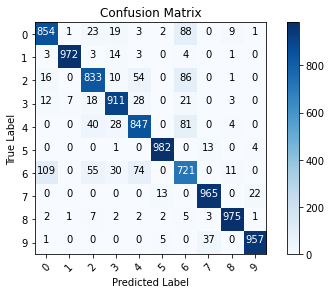

In [25]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix - no Normalization")

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment = "center",
            color='white' if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

pTst = model.predict(xTst).argmax(axis=1)
cm = confusion_matrix(yTst, pTst)
plot_confusion_matrix(cm, list(range(10)))

### Misclassified

NameError: name 'labels' is not defined

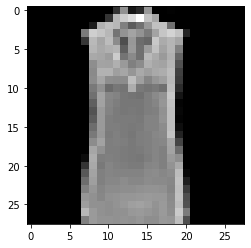

In [27]:
misclassified_idx = np.where(pTst != yTst)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(xTst[i].reshape(28,28), cmap='gray')
plt.title("True Label: %s Predicted: %s" % (labels[yTst[i]], labels[pTst[i]]));